## Traffic Sign Classification - DL

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:\Traffic_Signs\Datasets\Train'
valid_path = 'D:\Traffic_Signs\Datasets\Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('D:\Traffic_Signs\Datasets\Train\*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
#view the structure of model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:\Traffic_Signs\Datasets\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('D:\Traffic_Signs\Datasets\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\gagan\anaconda3\envs\trafficsign\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 1.0766 - accuracy: 0.5455 - val_loss: 4.5620 - val_accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 4.3237 - accuracy: 0.5455 - val_loss: 6.2625 - val_accuracy: 0.3000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 4.4901 - accuracy: 0.3636 - val_loss: 4.6982 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 2.9557 - accuracy: 0.5455 - val_loss: 3.8333 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 2.7792 - accuracy: 0.3636 - val_loss: 1.7002 - val_accuracy: 0.6000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 1.0199 - accuracy: 0.6364 - val_loss: 3.3015 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 1.8035 - accuracy: 0.5455 - val_loss: 3.1908 - val_accuracy: 0.6000
Epoch 8/50
1/1 [=========================

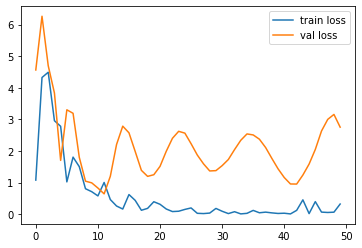

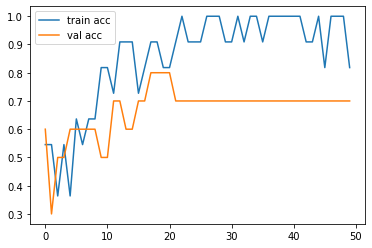

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\users\gagan\anaconda3\envs\trafficsign\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[1.0016195e-04, 9.9989986e-01, 1.5188004e-10],
       [9.9666059e-01, 3.3389025e-03, 5.2652808e-07],
       [4.5627303e-04, 9.9940491e-01, 1.3882521e-04],
       [1.3034229e-11, 1.0000000e+00, 7.0894202e-10],
       [1.1861430e-05, 9.9996352e-01, 2.4588144e-05],
       [1.4615662e-12, 1.0000000e+00, 7.2198988e-15],
       [1.4356589e-11, 1.0000000e+00, 5.4865269e-11],
       [1.0197850e-07, 9.9999928e-01, 5.7709832e-07],
       [1.8045412e-13, 9.8123429e-09, 1.0000000e+00],
       [2.6220758e-15, 1.7909970e-09, 1.0000000e+00]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

In [20]:
!pip install pillow

In [21]:
img=image.load_img(r'D:\Traffic_Signs\Datasets\Test\Cautionary_Signs\c.jpg',target_size=(224,224))

In [22]:
image

<module 'tensorflow.keras.preprocessing.image' from 'c:\\users\\gagan\\anaconda3\\envs\\trafficsign\\lib\\site-packages\\tensorflow\\keras\\preprocessing\\image\\__init__.py'>

In [23]:
x=image.img_to_array(img)
x

array([[[  0., 135., 216.],
        [  0., 135., 216.],
        [  0., 135., 216.],
        ...,
        [247., 244., 255.],
        [244., 241., 252.],
        [242., 239., 250.]],

       [[  0., 135., 216.],
        [  0., 135., 216.],
        [  0., 135., 216.],
        ...,
        [241., 238., 247.],
        [240., 237., 246.],
        [239., 236., 245.]],

       [[  0., 134., 215.],
        [  0., 135., 216.],
        [  0., 135., 216.],
        ...,
        [225., 228., 245.],
        [222., 225., 240.],
        [224., 227., 244.]],

       ...,

       [[151., 209., 246.],
        [154., 210., 247.],
        [155., 211., 248.],
        ...,
        [166., 216., 243.],
        [165., 217., 241.],
        [166., 216., 243.]],

       [[157., 209., 248.],
        [157., 209., 248.],
        [157., 209., 248.],
        ...,
        [173., 218., 247.],
        [176., 217., 245.],
        [179., 216., 245.]],

       [[157., 209., 248.],
        [157., 209., 248.],
        [157., 2

In [24]:
x.shape

(224, 224, 3)

In [25]:
x=x/255

In [26]:
x

array([[[0.        , 0.5294118 , 0.84705883],
        [0.        , 0.5294118 , 0.84705883],
        [0.        , 0.5294118 , 0.84705883],
        ...,
        [0.96862745, 0.95686275, 1.        ],
        [0.95686275, 0.94509804, 0.9882353 ],
        [0.9490196 , 0.9372549 , 0.98039216]],

       [[0.        , 0.5294118 , 0.84705883],
        [0.        , 0.5294118 , 0.84705883],
        [0.        , 0.5294118 , 0.84705883],
        ...,
        [0.94509804, 0.93333334, 0.96862745],
        [0.9411765 , 0.92941177, 0.9647059 ],
        [0.9372549 , 0.9254902 , 0.9607843 ]],

       [[0.        , 0.5254902 , 0.84313726],
        [0.        , 0.5294118 , 0.84705883],
        [0.        , 0.5294118 , 0.84705883],
        ...,
        [0.88235295, 0.89411765, 0.9607843 ],
        [0.87058824, 0.88235295, 0.9411765 ],
        [0.8784314 , 0.8901961 , 0.95686275]],

       ...,

       [[0.5921569 , 0.81960785, 0.9647059 ],
        [0.6039216 , 0.8235294 , 0.96862745],
        [0.60784316, 0

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[2.1100058e-07, 9.9999976e-01, 1.7903520e-08]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a==1

array([ True])